# IMPORT AND PERFORM EXPLORATORY DATA ANALYSIS 

In [1]:
#Import our libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
# Load the data

reviews_df = pd.read_csv(r'C:\Users\wagou\Downloads\amazon_alexa.tsv', sep='\t')
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
# View the Dataframe Information

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
# View datframe Statistical summary

reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


[Text(0.5, 1.0, 'Rating distribution')]

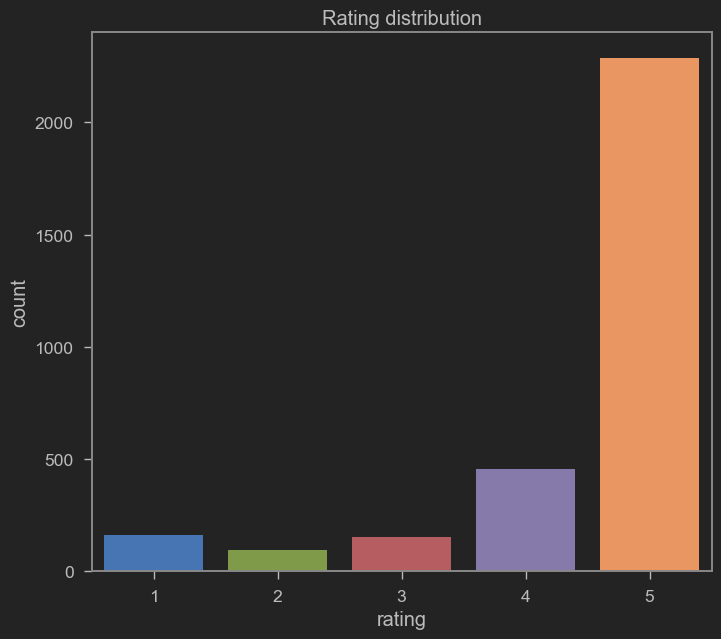

In [5]:
# Plot the count plot for the ratings

sns.countplot(x = reviews_df['rating']).set(title = 'Rating distribution')

In [6]:
# Let's get the length of the verified reviews

reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


[Text(0.5, 1.0, 'Review length distribution')]

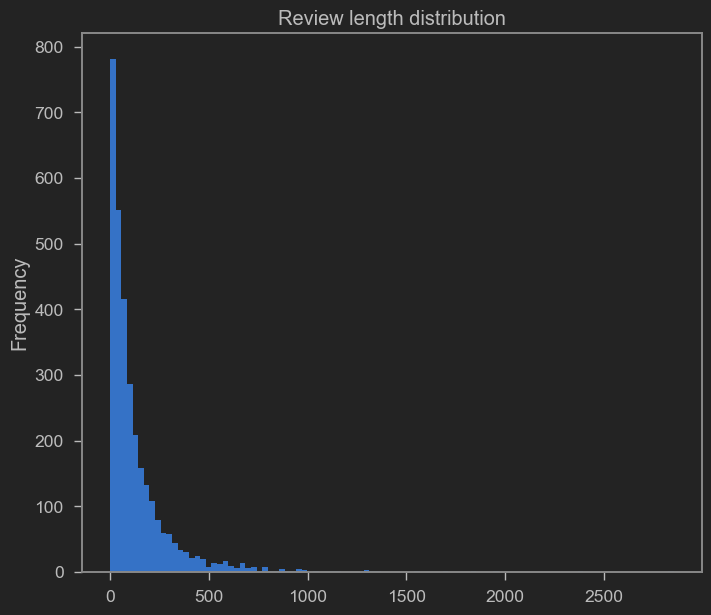

In [7]:
# Plot the histogram for the length

reviews_df['length'].plot(bins=100, kind='hist').set(title = 'Review length distribution')

In [8]:
# Apply the describe method to get statistical summary

reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


[Text(0.5, 1.0, 'Feedback distribution')]

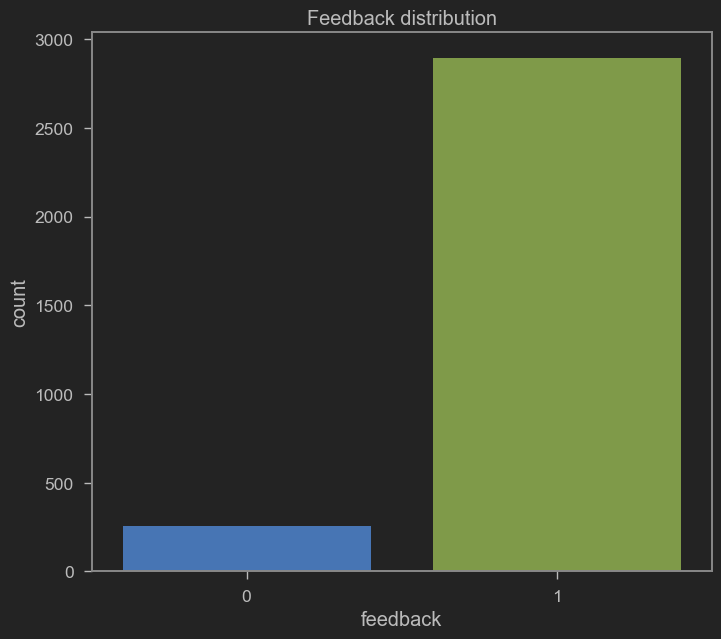

In [9]:
# Plot the countplot for feedback 
# positive feedback ~ 2800
# negative feedback ~ 250

sns.countplot(x = reviews_df['feedback']).set(title = 'Feedback distribution')


# PLOT WORLDCLOUD

In [10]:
# Obtain only the positive reviews

positive = reviews_df[ reviews_df['feedback'] == 1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [11]:
# Obtain only the negative reviews

negative = reviews_df[ reviews_df['feedback'] == 0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [12]:
# Convert to list format

sentences = positive['verified_reviews'].tolist()
len(sentences)

2893

In [13]:
# Join all reviews into one large string


sentences_as_one_string =" ".join(sentences)


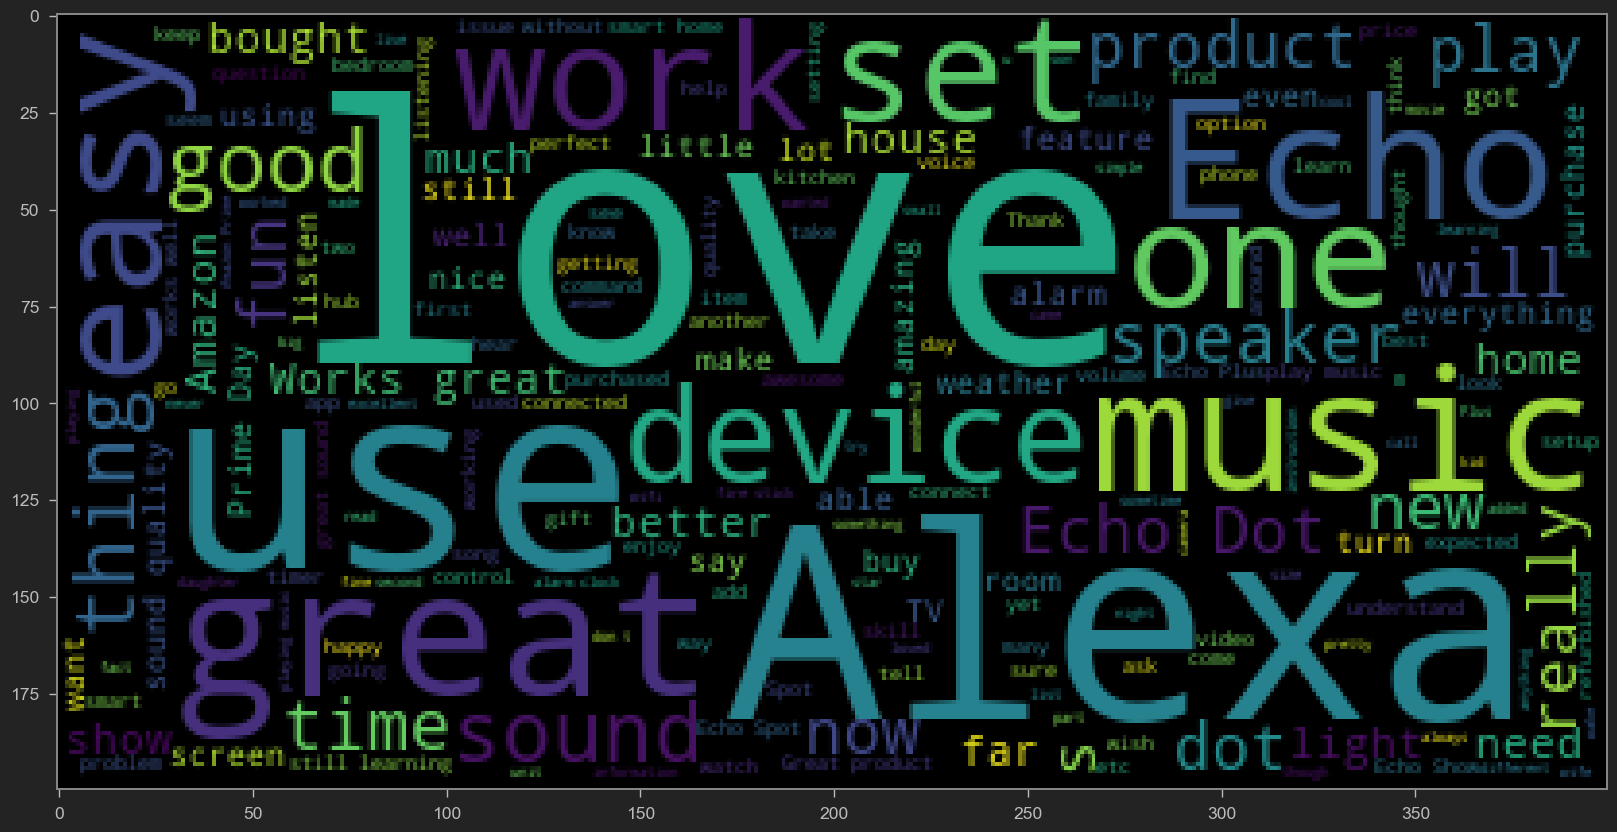

In [14]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [15]:
# Convert to list format

sentences = negative['verified_reviews'].tolist()
len(sentences)

257

In [16]:
# Join all reviews into one large string


sentences_as_one_string =" ".join(sentences)


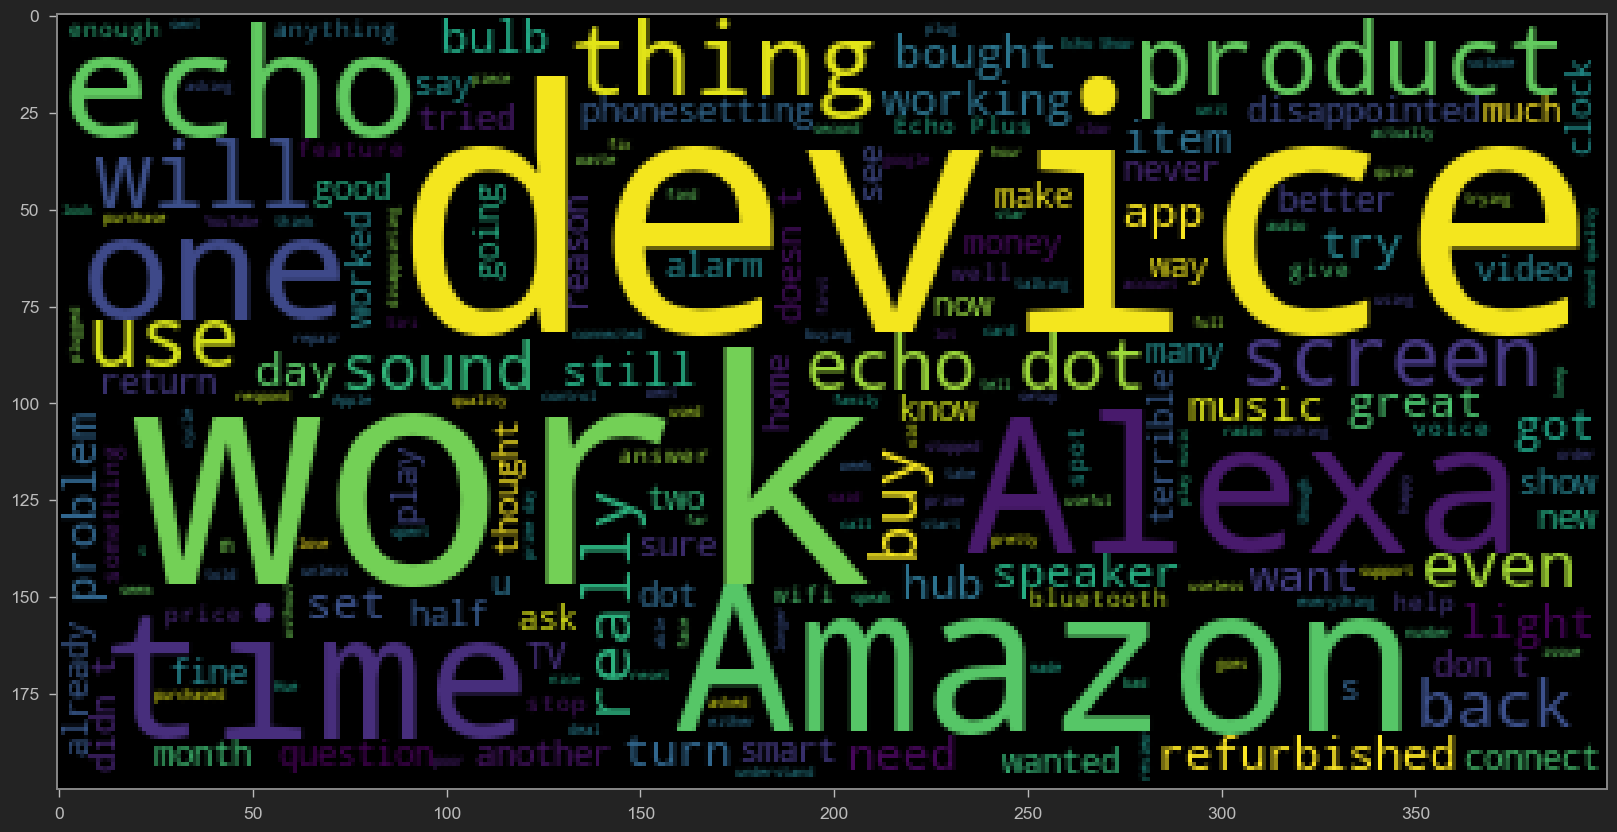

In [17]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))


# PERFORM DATA CLEANING

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
import nltk # Natural Language Tool Kit
nltk.download('stopwords')

from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wagou\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Let's define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [21]:
# Let's test the newly added function

reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [22]:
# show the original review
print(reviews_df['verified_reviews'][5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [23]:
# show the clean review
print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [24]:
# Tokenization of the clean review

from sklearn.feature_extraction.text import CountVectorizer

# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [25]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

C:\Users\wagou\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
reviews_countvectorizer.shape

(3150, 5211)

In [28]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [29]:
x = reviews

In [30]:
y = reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64


# TRAIN AND TEST AI/ML MODELS

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [32]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

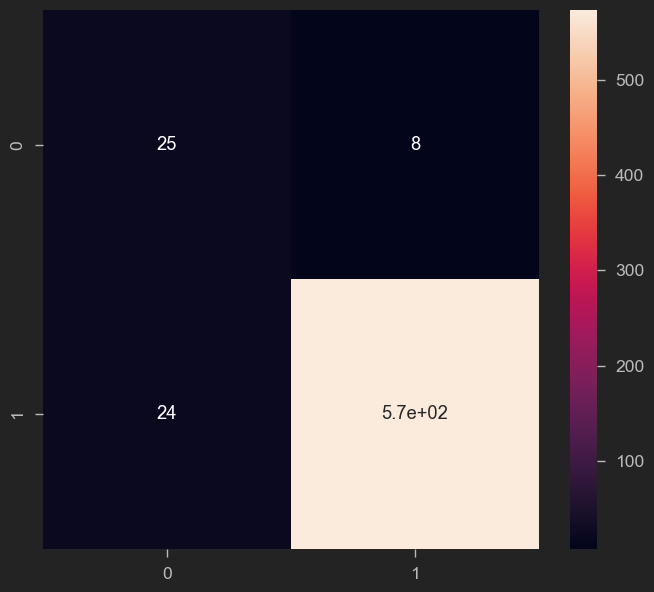

In [34]:
# Predicting the Test set results

y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_predict_test, y_test)
sns.heatmap(cm, annot=True)

In [35]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.76      0.51      0.61        49
           1       0.96      0.99      0.97       581

    accuracy                           0.95       630
   macro avg       0.86      0.75      0.79       630
weighted avg       0.94      0.95      0.94       630



              precision    recall  f1-score   support

           0       0.64      0.33      0.43        49
           1       0.95      0.98      0.96       581

    accuracy                           0.93       630
   macro avg       0.79      0.66      0.70       630
weighted avg       0.92      0.93      0.92       630



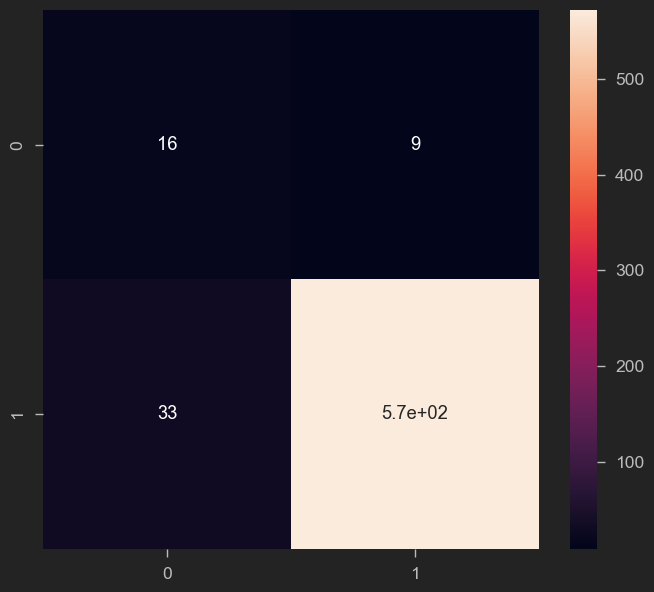

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = confusion_matrix(y_pred, y_test)

sns.heatmap(cm, annot=True) 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.27      0.40        49
           1       0.94      0.99      0.97       581

    accuracy                           0.94       630
   macro avg       0.88      0.63      0.68       630
weighted avg       0.93      0.94      0.92       630



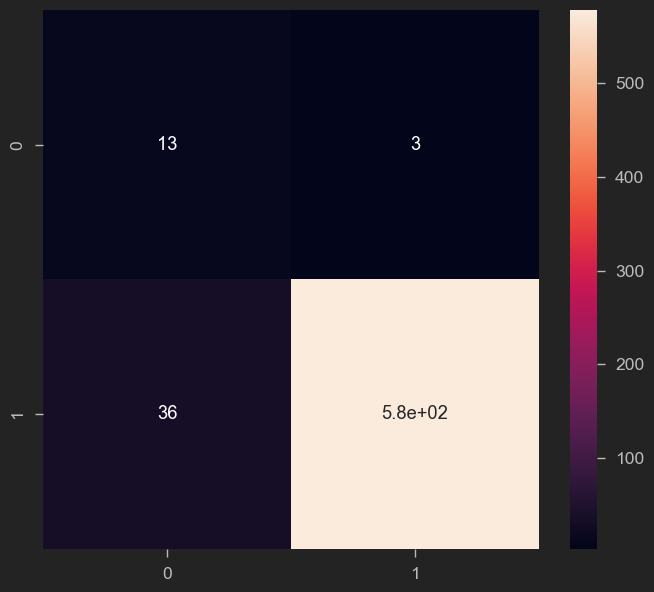

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_pred))